# Studying climate in Spain

2022 is really hot, huh? But is it the hotest summer in Spain so far ever as many people say? Let's see it. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
working_df = pd.read_csv('C:/Users/AFERRERO/Escritorio/alexferrero/climate_study/aemet_data.csv', sep='|')

In [3]:
working_df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,tmax,horatmin,horatmax
0,1920-05-02,4605,HUELVA,HUELVA,17,"18,3","0,8","15,5","21,1",NaN,NaN
1,1920-05-02,0370B,"GIRONA, ANTIC INSTITUT",GIRONA,95,"18,0","0,0","12,2","23,8",NaN,NaN
2,1920-05-02,8501,CASTELLÓ DE LA PLANA,CASTELLON,23,"15,8","0,0","11,5","20,2",NaN,NaN
3,1920-05-02,C430E,IZAÑA,STA. CRUZ DE TENERIFE,2371,"10,6","0,0","6,7","14,6",23:59,13:20
4,1920-05-02,3259,"TOLEDO, LORENZANA",TOLEDO,540,"18,1","0,0","15,0","21,2",NaN,NaN


**fecha: Date**

**indicativo: Identifyer**

**nombre: Name of the station**

**provincia: Province**

**altitud: Altitude**

**tmed: Mean temperature**

**prec: Rainfall**

**tmin: Min temperature**

**tmax: Max temperature**

**horatmin: Hour and minute of min temperature**

**horatmax: Hour and minute of max temperature**

Convert date column to datetime and create columns for year, month and day:

In [4]:
def date_to_datetime(date):
    return datetime.strptime(date,'%Y-%m-%d')

In [5]:
working_df['fecha'] = working_df['fecha'].apply(date_to_datetime)

In [6]:
working_df['year'] = working_df['fecha'].dt.year
working_df['month'] = working_df['fecha'].dt.month
working_df['day'] = working_df['fecha'].dt.day

In [7]:
working_df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,tmax,horatmin,horatmax,year,month,day
0,1920-05-02,4605,HUELVA,HUELVA,17,"18,3","0,8","15,5","21,1",NaN,NaN,1920,5,2
1,1920-05-02,0370B,"GIRONA, ANTIC INSTITUT",GIRONA,95,"18,0","0,0","12,2","23,8",NaN,NaN,1920,5,2
2,1920-05-02,8501,CASTELLÓ DE LA PLANA,CASTELLON,23,"15,8","0,0","11,5","20,2",NaN,NaN,1920,5,2
3,1920-05-02,C430E,IZAÑA,STA. CRUZ DE TENERIFE,2371,"10,6","0,0","6,7","14,6",23:59,13:20,1920,5,2
4,1920-05-02,3259,"TOLEDO, LORENZANA",TOLEDO,540,"18,1","0,0","15,0","21,2",NaN,NaN,1920,5,2


In [8]:
def to_float(n):
    n = str(n)
    return float(n.replace(',', '.'))

In [9]:
working_df['tmed'] = working_df['tmed'].apply(to_float)
working_df['tmin'] = working_df['tmin'].apply(to_float)
working_df['tmax'] = working_df['tmax'].apply(to_float)

In [10]:
working_df.isna().sum()

fecha              0
indicativo         0
nombre             0
provincia          0
altitud            0
tmed          134383
prec           69352
tmin          132502
tmax          132923
horatmin      343303
horatmax      341667
year               0
month              0
day                0
dtype: int64

There are nans in tmed which is the most important column for this study, so I'm getting rid of those.

First of all, let's fill those nans with the median of temperature by year, month and province. The rest of the nans are going to be dropped, as that means that we have no data at all for that specific month, year and province.

In [11]:
working_df["tmed"] = working_df.groupby(["year","month","provincia"])["tmed"].transform(lambda x: x.fillna(x.mean()))
working_df = working_df.dropna(subset=['tmed'])

In [12]:
working_df.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,tmax,horatmin,horatmax,year,month,day
0,1920-05-02,4605,HUELVA,HUELVA,17,18.3,"0,8",15.5,21.1,NaN,NaN,1920,5,2
1,1920-05-02,0370B,"GIRONA, ANTIC INSTITUT",GIRONA,95,18.0,"0,0",12.2,23.8,NaN,NaN,1920,5,2
2,1920-05-02,8501,CASTELLÓ DE LA PLANA,CASTELLON,23,15.8,"0,0",11.5,20.2,NaN,NaN,1920,5,2
3,1920-05-02,C430E,IZAÑA,STA. CRUZ DE TENERIFE,2371,10.6,"0,0",6.7,14.6,23:59,13:20,1920,5,2
4,1920-05-02,3259,"TOLEDO, LORENZANA",TOLEDO,540,18.1,"0,0",15.0,21.2,NaN,NaN,1920,5,2


In [13]:
working_df_grouped = working_df[['year', 'provincia', 'tmed']].groupby(['year', 'provincia']).mean().reset_index()
working_df_grouped

,year,provincia,tmed
0,1920,CACERES,21.493820
1,1920,CASTELLON,21.878652
2,1920,CIUDAD REAL,21.336517
3,1920,GIRONA,20.578090
4,1920,HUELVA,22.392135
...,...,...,...
4189,2022,TOLEDO,25.067851
4190,2022,VALENCIA,24.234414
4191,2022,VALLADOLID,20.984831
4192,2022,ZAMORA,20.827341


In [14]:
working_df_grouped['provincia'].value_counts()

CACERES                  103
ZARAGOZA                 103
CASTELLON                103
HUELVA                   103
MADRID                   103
STA. CRUZ DE TENERIFE    103
CIUDAD REAL              102
TARRAGONA                102
TOLEDO                   102
BARCELONA                 99
CANTABRIA                 99
JAEN                      96
GIPUZKOA                  95
GIRONA                    94
A CORUÑA                  93
ZAMORA                    91
SEGOVIA                   86
ALICANTE                  85
ASTURIAS                  85
LEON                      85
VALENCIA                  85
VALLADOLID                85
ALBACETE                  83
MURCIA                    82
MALAGA                    81
BURGOS                    80
HUESCA                    80
SORIA                     79
ARABA/ALAVA               78
CADIZ                     78
SALAMANCA                 78
LLEIDA                    77
BIZKAIA                   76
LA RIOJA                  74
GRANADA       

In order to be as precise as posible, let's just choose cities that have a complete history of temperatures:

CACERES, ZARAGOZA, CASTELLON, HUELVA, MADRID, STA. CRUZ DE TENERIFE

In [15]:
working_stations = ['CACERES', 'ZARAGOZA', 'CASTELLON', 'HUELVA', 'MADRID', 'STA. CRUZ DE TENERIFE']
working_df_grouped_filtered = working_df_grouped[working_df_grouped['provincia'].isin(working_stations)]
working_df_grouped_filtered.head()

,year,provincia,tmed
0,1920,CACERES,21.493820
1,1920,CASTELLON,21.878652
4,1920,HUELVA,22.392135
6,1920,MADRID,19.823034
7,1920,STA. CRUZ DE TENERIFE,12.693258


In [16]:
sns.set(rc={"figure.figsize":(25, 12)})

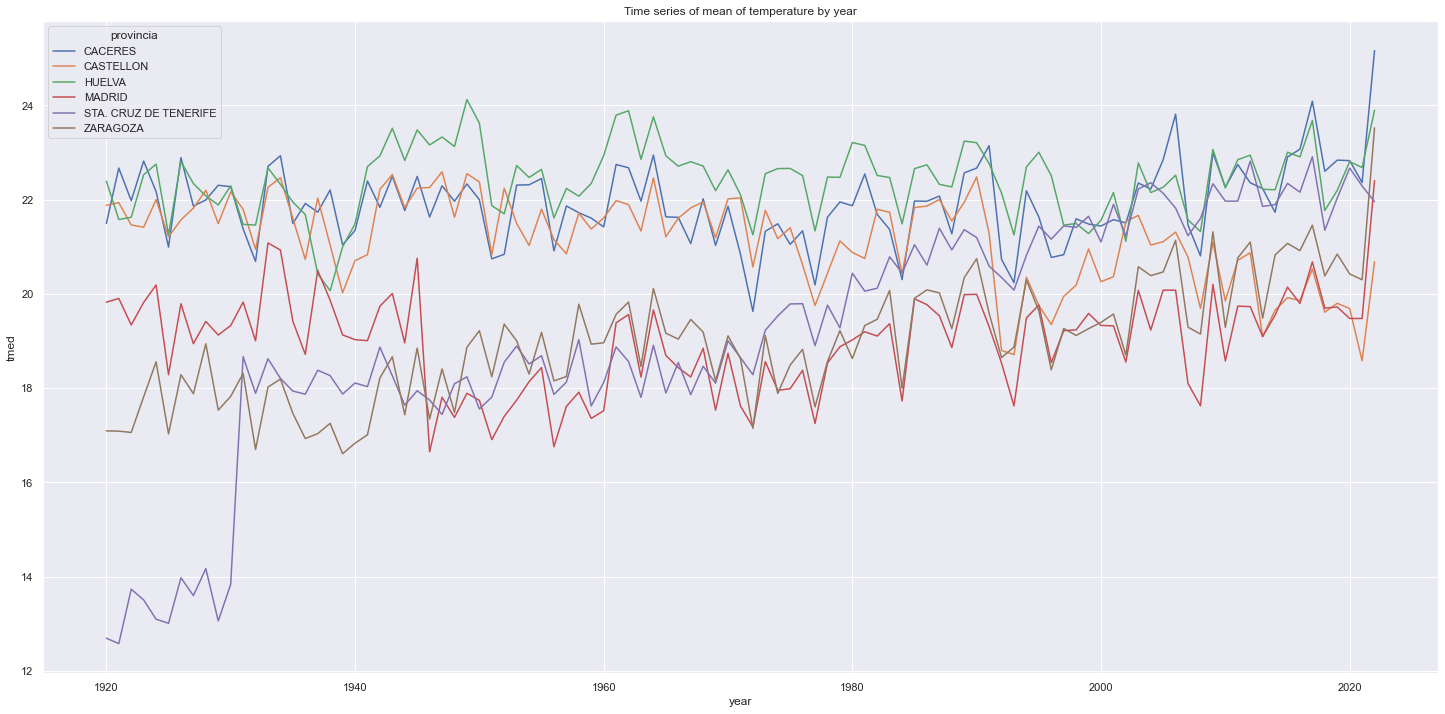

In [17]:
sns.lineplot(x='year', y='tmed', hue='provincia', data=working_df_grouped_filtered).set_title("Time series of mean of temperature by year");

At first glance there is not a huge increase in temperatures, but this represents the mean of temperatures per year between may and october, so let's go deep by month. Also, to be more specific, let's just study Madrid in this case.

In [18]:
df_gmonth = working_df[working_df['nombre']=='MADRID, RETIRO'][['year', 'month', 'provincia', 'tmed']] \
                    .groupby(['year','month', 'provincia']).mean().reset_index()
df_gmonth

,year,month,provincia,tmed
0,1920,5,MADRID,18.540000
1,1920,6,MADRID,21.203448
2,1920,7,MADRID,23.866667
3,1920,8,MADRID,23.920000
4,1920,9,MADRID,19.296552
...,...,...,...,...
610,2021,9,MADRID,20.706897
611,2021,10,MADRID,16.256667
612,2022,5,MADRID,20.603333
613,2022,6,MADRID,24.810345


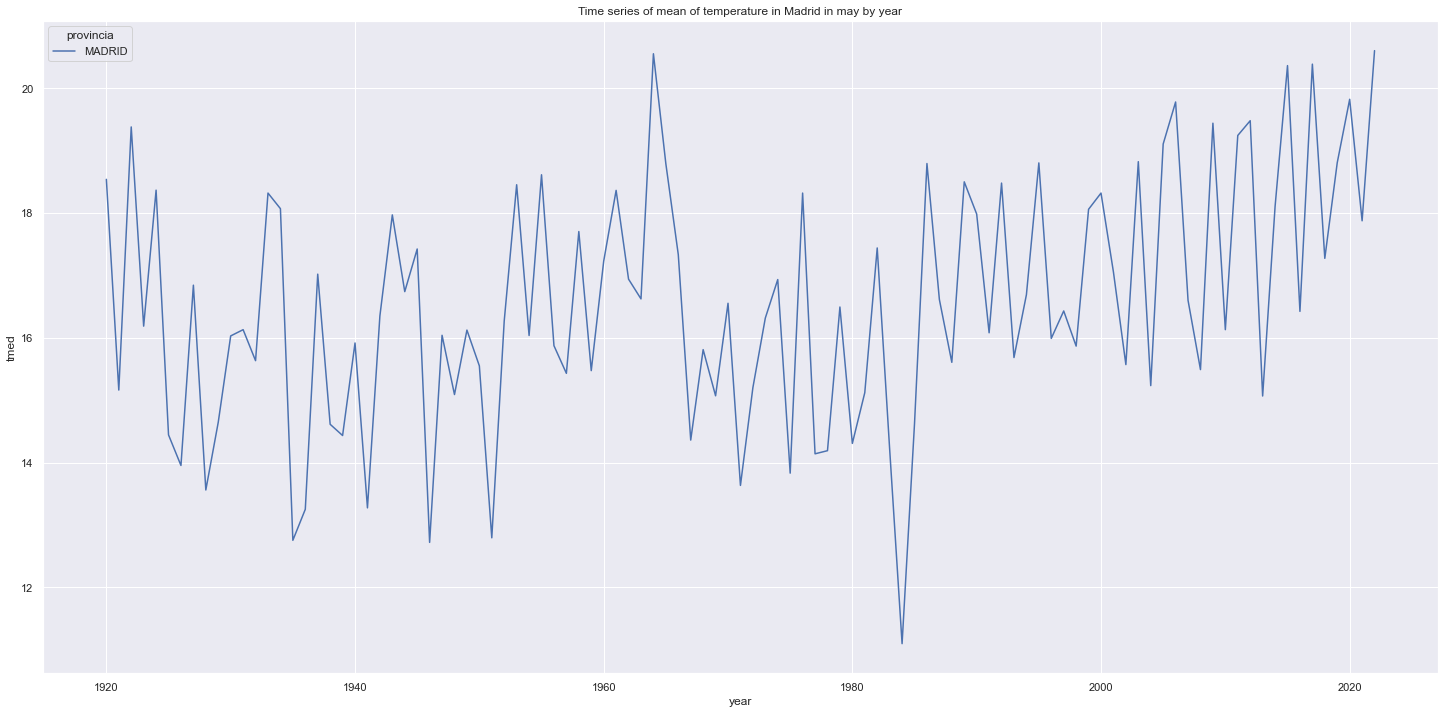

In [19]:
sns.lineplot(x='year', y='tmed', hue='provincia', data=df_gmonth[df_gmonth['month']==5])\
    .set_title("Time series of mean of temperature in Madrid in may by year");

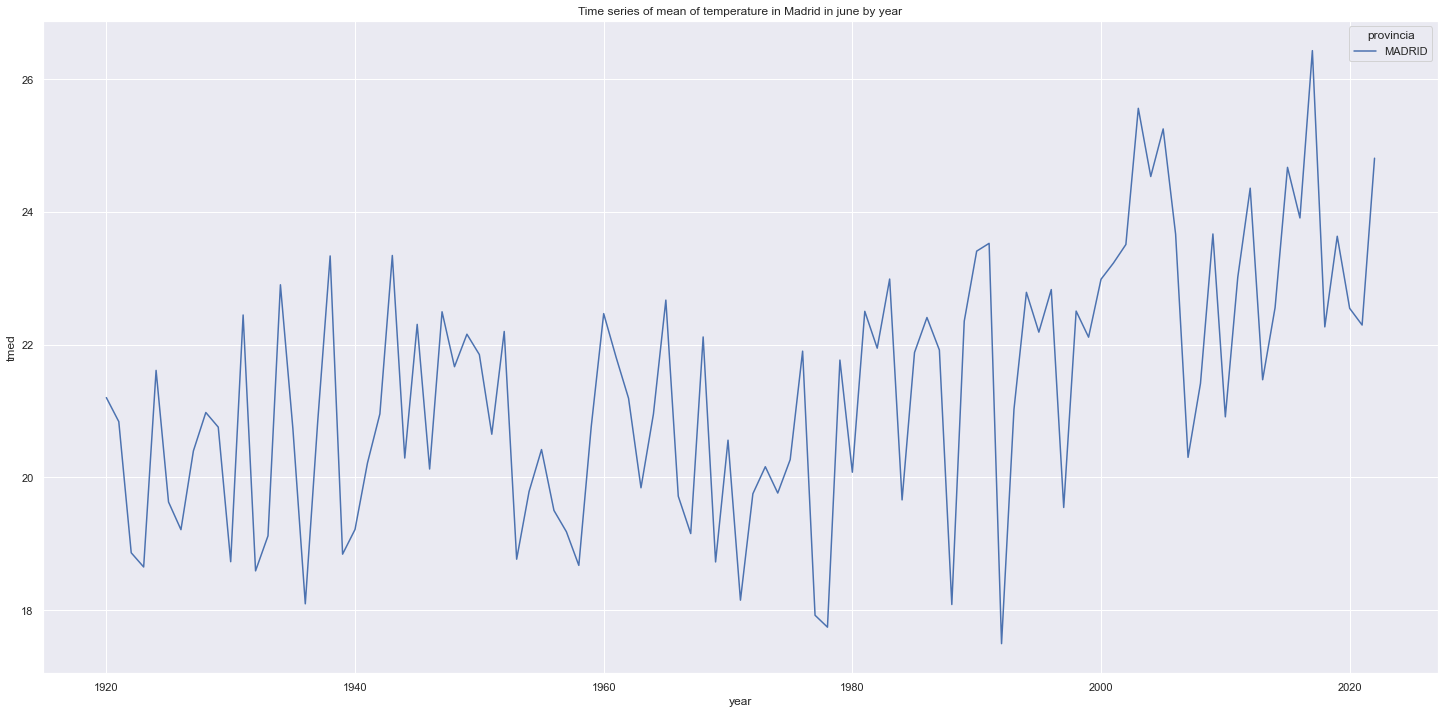

In [20]:
sns.lineplot(x='year', y='tmed', hue='provincia', data=df_gmonth[df_gmonth['month']==6])\
    .set_title("Time series of mean of temperature in Madrid in june by year");

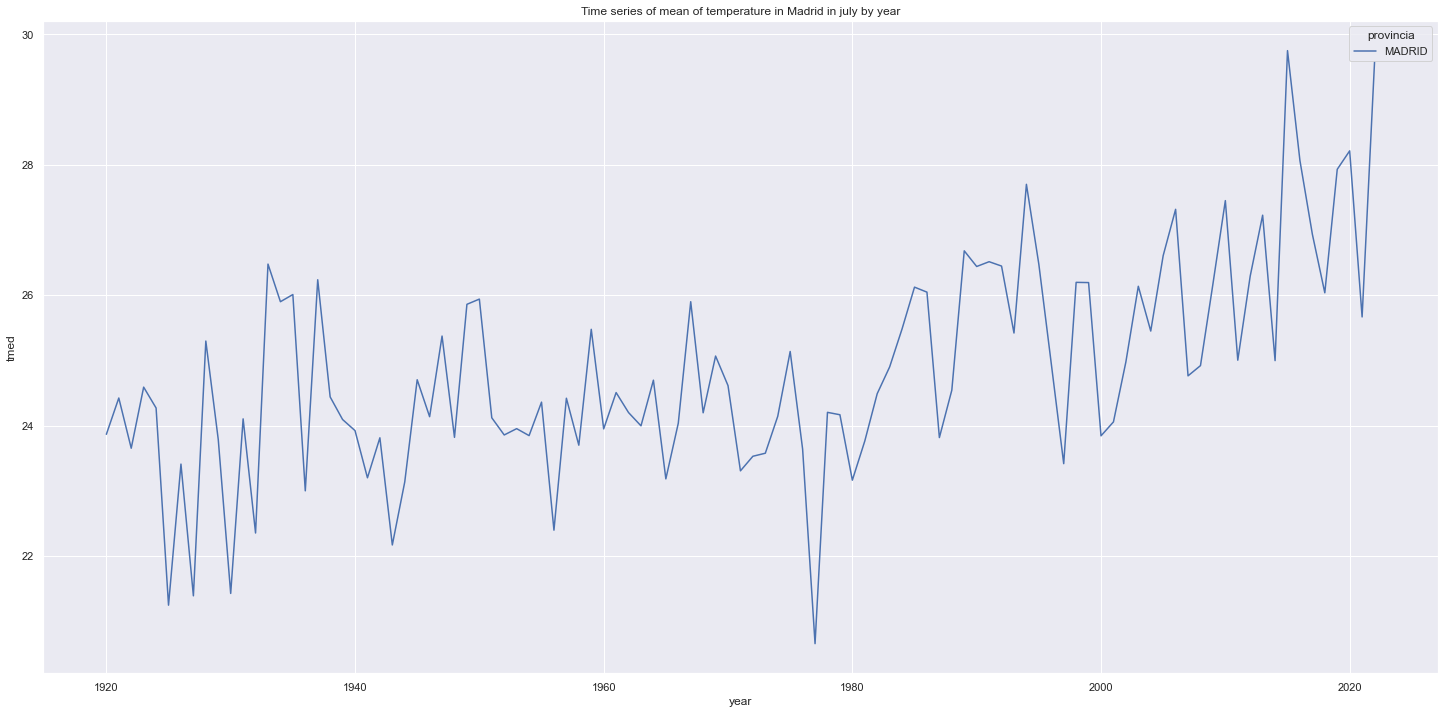

In [21]:
sns.lineplot(x='year', y='tmed', hue='provincia', data=df_gmonth[df_gmonth['month']==7])\
    .set_title("Time series of mean of temperature in Madrid in july by year");

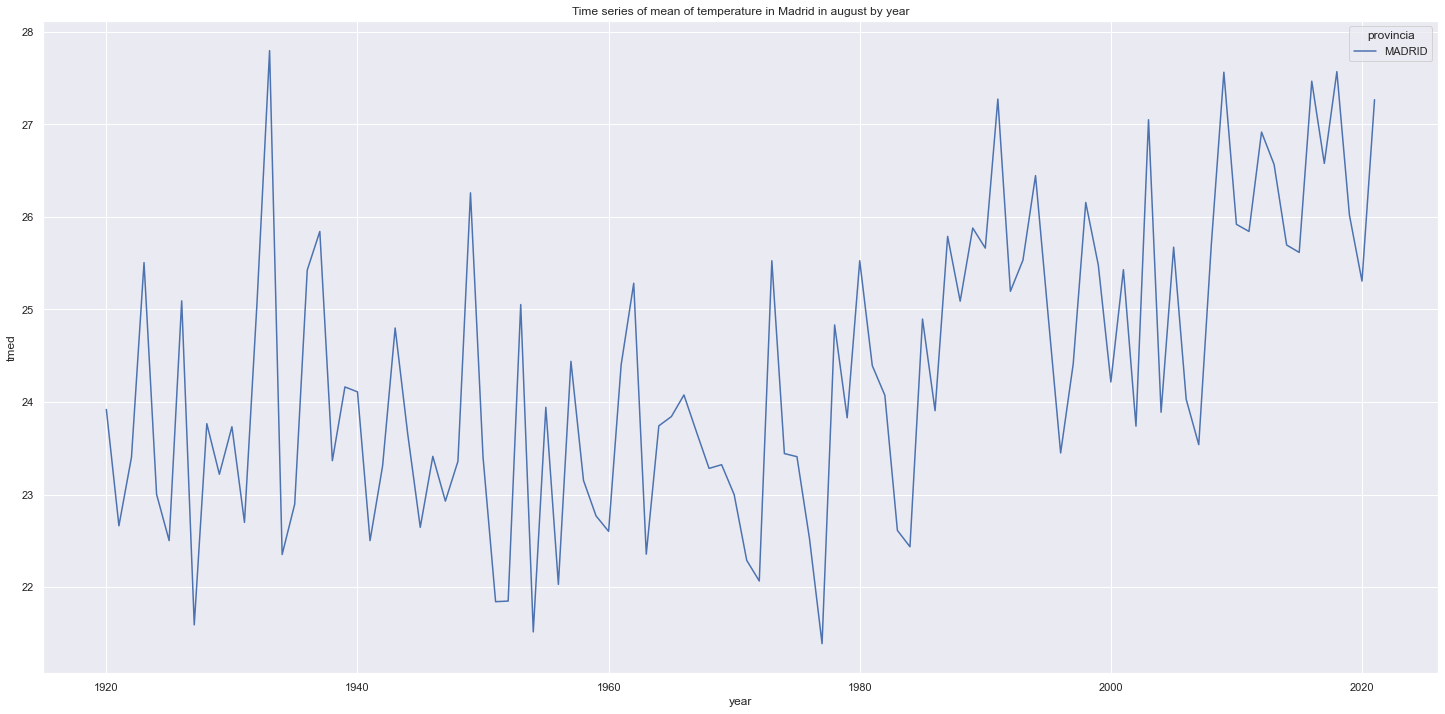

In [22]:
sns.lineplot(x='year', y='tmed', hue='provincia', data=df_gmonth[df_gmonth['month']==8])\
    .set_title("Time series of mean of temperature in Madrid in august by year");

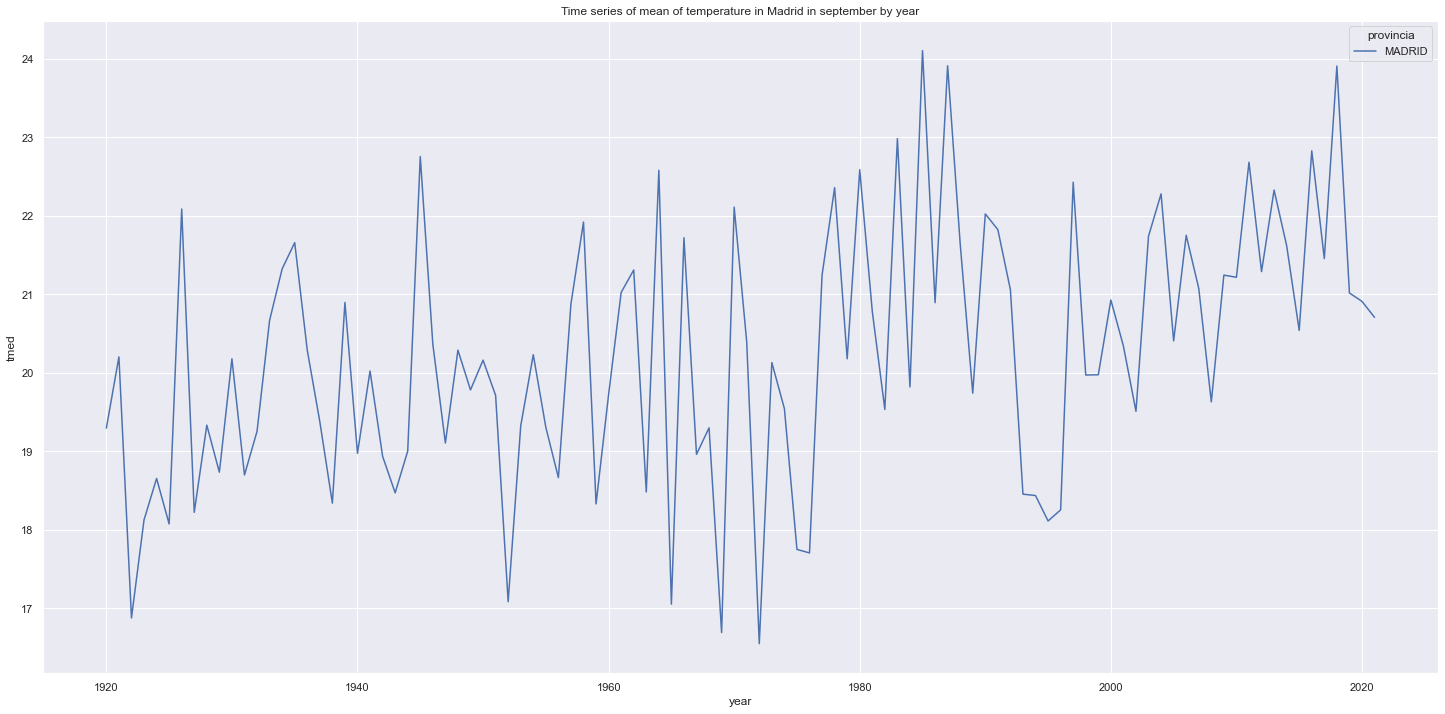

In [23]:
sns.lineplot(x='year', y='tmed', hue='provincia', data=df_gmonth[df_gmonth['month']==9])\
    .set_title("Time series of mean of temperature in Madrid in september by year");

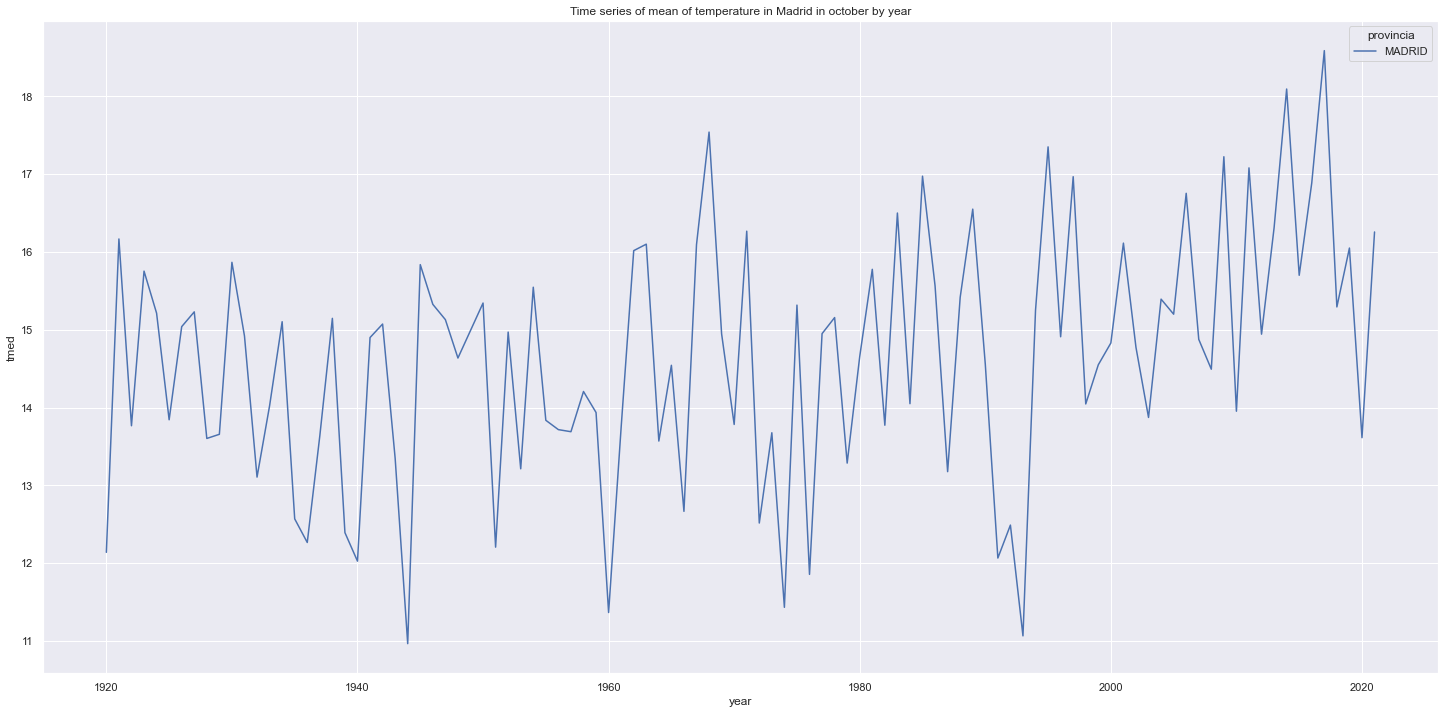

In [24]:
sns.lineplot(x='year', y='tmed', hue='provincia', data=df_gmonth[df_gmonth['month']==10])\
    .set_title("Time series of mean of temperature in Madrid in october by year");

In [52]:
for i in range (5,11):
    print(df_gmonth[df_gmonth['month']==i].sort_values('tmed', ascending=False).head(10))
    print('---------------------------------------------------------------------------')

     year  month provincia       tmed
612  2022      5    MADRID  20.603333
264  1964      5    MADRID  20.553333
582  2017      5    MADRID  20.386667
570  2015      5    MADRID  20.363333
600  2020      5    MADRID  19.823333
516  2006      5    MADRID  19.780000
552  2012      5    MADRID  19.480000
534  2009      5    MADRID  19.440000
12   1922      5    MADRID  19.380000
546  2011      5    MADRID  19.243333
---------------------------------------------------------------------------
     year  month provincia       tmed
583  2017      6    MADRID  26.431034
499  2003      6    MADRID  25.562069
511  2005      6    MADRID  25.251724
613  2022      6    MADRID  24.810345
571  2015      6    MADRID  24.672414
505  2004      6    MADRID  24.534483
553  2012      6    MADRID  24.358621
577  2016      6    MADRID  23.910345
535  2009      6    MADRID  23.668966
517  2006      6    MADRID  23.665517
---------------------------------------------------------------------------
     year  m

May 2022 was the hottest May in Madrid since 1920. Wow, wasn't expecting that. 

Also, although june 2022 was pretty hot in Madrid, it was not the hottest June since 1920 in Madrid, being on 4th place.

July 2022 was the second hottest July in Madrid since 1920. 

Although there is still no data for august, september and october 2022, we can still take a look at them.

An objective opinion would be that temperature has a slightly growing trend since 1920. Also, it stays more or less bounded between a maximum and a minimum and fluctuates a lot inside those limits.

Nonetheless, I believe that studying 100 years of climate considering that the earth is 4.54 billion years old is really naive and everyone should be extremely cautious jumping to conclusions. Imagine studying a stock that has been in the market for years with just the data of the last minute. You wouldn't invest your savings, right?

In [29]:
working_df[working_df['nombre']=='MADRID, RETIRO'].isna().sum()

fecha           0
indicativo      0
nombre          0
provincia       0
altitud         0
tmed            0
prec          326
tmin            8
tmax            7
horatmin      483
horatmax      471
year            0
month           0
day             0
dtype: int64

For Madrid we have all the data available, so let's dive into more plots:

In [30]:
working_df_mad = working_df[working_df['nombre']=='MADRID, RETIRO']

In [31]:
working_df_mad[working_df_mad['tmax'].isna()]

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,tmax,horatmin,horatmax,year,month,day
2851,1921-05-31,3195,"MADRID, RETIRO",MADRID,667,15.162069,"1,8",NaN,NaN,NaN,NaN,1921,5,31
1715953,2017-07-20,3195,"MADRID, RETIRO",MADRID,667,24.112661,"0,0",NaN,NaN,NaN,NaN,2017,7,20
1718942,2017-08-02,3195,"MADRID, RETIRO",MADRID,667,23.855412,"0,0",NaN,NaN,NaN,NaN,2017,8,2
1872044,2021-05-06,3195,"MADRID, RETIRO",MADRID,667,15.630696,"0,0",NaN,NaN,NaN,NaN,2021,5,6
1872285,2021-05-07,3195,"MADRID, RETIRO",MADRID,667,15.630696,"0,1",NaN,NaN,NaN,NaN,2021,5,7
1932180,2022-07-18,3195,"MADRID, RETIRO",MADRID,667,27.035014,"0,0",NaN,NaN,NaN,NaN,2022,7,18
1932419,2022-07-19,3195,"MADRID, RETIRO",MADRID,667,27.035014,"0,0",NaN,NaN,NaN,NaN,2022,7,19


Calculation of df with the mean of max temperature per year and month

In [32]:
df_maxmonth = working_df_mad[['year', 'month', 'provincia', 'tmax']].groupby(['year','month', 'provincia']).mean().reset_index()
df_maxmonth

,year,month,provincia,tmax
0,1920,5,MADRID,25.010000
1,1920,6,MADRID,27.403448
2,1920,7,MADRID,31.170000
3,1920,8,MADRID,31.083333
4,1920,9,MADRID,25.237931
...,...,...,...,...
610,2021,9,MADRID,25.517241
611,2021,10,MADRID,20.870000
612,2022,5,MADRID,26.990000
613,2022,6,MADRID,31.386207


In [53]:
for i in range (5,11):
    print(df_maxmonth[df_maxmonth['month']==i].sort_values('tmax', ascending=False).head(10))
    print('---------------------------------------------------------------------------')

     year  month provincia       tmax
570  2015      5    MADRID  27.353333
612  2022      5    MADRID  26.990000
12   1922      5    MADRID  26.510000
582  2017      5    MADRID  26.330000
264  1964      5    MADRID  26.273333
600  2020      5    MADRID  26.086667
534  2009      5    MADRID  26.003333
594  2019      5    MADRID  25.646667
552  2012      5    MADRID  25.600000
516  2006      5    MADRID  25.576667
---------------------------------------------------------------------------
     year  month provincia       tmax
583  2017      6    MADRID  33.079310
499  2003      6    MADRID  31.800000
511  2005      6    MADRID  31.500000
613  2022      6    MADRID  31.386207
571  2015      6    MADRID  31.151724
505  2004      6    MADRID  30.872414
577  2016      6    MADRID  30.693103
109  1938      6    MADRID  30.620690
427  1991      6    MADRID  30.558621
553  2012      6    MADRID  30.548276
---------------------------------------------------------------------------
     year  m

So July 2022 has been the year with the highest mean of max temperature since 1920, and may 2022 the second.

What about rain?

In [36]:
working_df_mad[working_df_mad['prec'].isna()]

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,tmax,horatmin,horatmax,year,month,day
4398,1921-10-02,3195,"MADRID, RETIRO",MADRID,667,18.2,NaN,12.5,24.0,NaN,NaN,1921,10,2
4411,1921-10-03,3195,"MADRID, RETIRO",MADRID,667,19.4,NaN,13.5,25.2,NaN,NaN,1921,10,3
4424,1921-10-04,3195,"MADRID, RETIRO",MADRID,667,21.0,NaN,14.7,27.2,NaN,NaN,1921,10,4
4437,1921-10-05,3195,"MADRID, RETIRO",MADRID,667,20.2,NaN,15.3,25.2,NaN,NaN,1921,10,5
4450,1921-10-06,3195,"MADRID, RETIRO",MADRID,667,19.4,NaN,13.3,25.6,NaN,NaN,1921,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60332,1938-09-26,3195,"MADRID, RETIRO",MADRID,667,17.8,NaN,13.8,21.8,06:45,12:45,1938,9,26
60356,1938-09-27,3195,"MADRID, RETIRO",MADRID,667,18.4,NaN,12.5,24.4,05:00,12:45,1938,9,27
60380,1938-09-28,3195,"MADRID, RETIRO",MADRID,667,19.5,NaN,14.0,25.0,06:00,13:00,1938,9,28
60404,1938-09-29,3195,"MADRID, RETIRO",MADRID,667,18.4,NaN,12.5,24.4,04:00,12:45,1938,9,29


As there is no data of rain before 1938-09-30, let's just drop data before that date:

In [37]:
df_prec = working_df_mad.dropna(subset=['prec']).copy()

In [38]:
df_prec['prec'].unique()

array(['0,3', '0,0', 'Ip', '2,6', '38,4', '0,8', '4,7', '5,6', '22,9',
       '0,5', '1,4', '13,9', '6,2', '1,0', '2,7', '4,0', '2,1', '13,3',
       '15,3', '3,5', '0,1', '11,4', '0,9', '0,2', '2,4', '15,9', '0,4',
       '1,8', '5,1', '1,1', '12,8', '4,6', '1,2', '24,2', '9,5', '13,7',
       '2,8', '5,2', '2,9', '6,4', '1,5', '12,3', '27,0', '7,1', '12,2',
       '3,8', '10,7', '4,4', '6,5', '14,0', '3,0', '24,8', '17,2', '12,4',
       '1,6', '0,7', '23,7', '4,5', '9,6', '5,8', '10,4', '17,6', '9,2',
       '8,4', '2,0', '8,0', '7,0', '12,6', '4,8', '0,6', '19,2', '6,8',
       '4,2', '18,2', '3,2', '10,8', '3,4', '8,5', '28,2', '15,0', '1,7',
       '6,3', '11,2', '9,4', '6,9', '2,2', '3,9', '7,8', '16,7', '3,7',
       '1,9', '2,5', '1,3', '10,3', '6,6', '3,3', '3,1', '2,3', '16,2',
       '5,7', '8,3', '17,4', '8,7', '5,3', '18,1', '16,6', '9,1', '15,2',
       '8,6', '11,9', '5,4', '4,9', '14,5', '16,5', '6,1', '4,3', '15,1',
       '10,6', '5,9', '7,7', '15,5', '17,7', '7,3', 

For the purpose of this study, let's consider Ip (precipitación inapreciable / negligible precipitation) 0, as it is less than 0.1mm.

In [39]:
df_prec.loc[df_prec['prec'] == 'Ip', 'prec'] = 0

In [40]:
df_prec['prec'] = df_prec['prec'].apply(to_float)

In [41]:
df_gprec = df_prec[['year', 'month', 'provincia', 'prec']].groupby(['year','month', 'provincia']).mean().reset_index()
df_gprec

,year,month,provincia,prec
0,1920,5,MADRID,2.510000
1,1920,6,MADRID,0.544828
2,1920,7,MADRID,0.206667
3,1920,8,MADRID,0.043333
4,1920,9,MADRID,0.124138
...,...,...,...,...
599,2021,9,MADRID,2.855172
600,2021,10,MADRID,4.433333
601,2022,5,MADRID,0.206667
602,2022,6,MADRID,0.010345


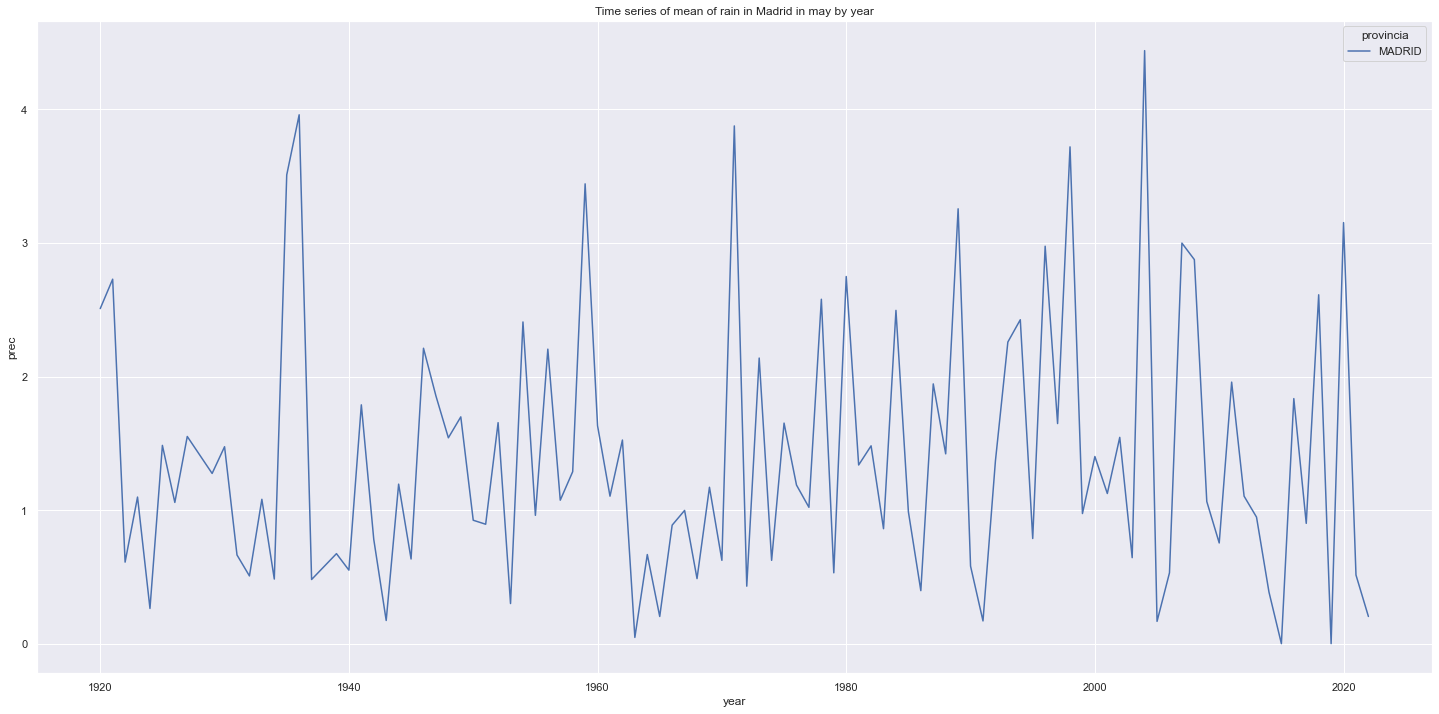

In [42]:
sns.lineplot(x='year', y='prec', hue='provincia', data=df_gprec[df_gprec['month']==5])\
    .set_title("Time series of mean of rain in Madrid in may by year");

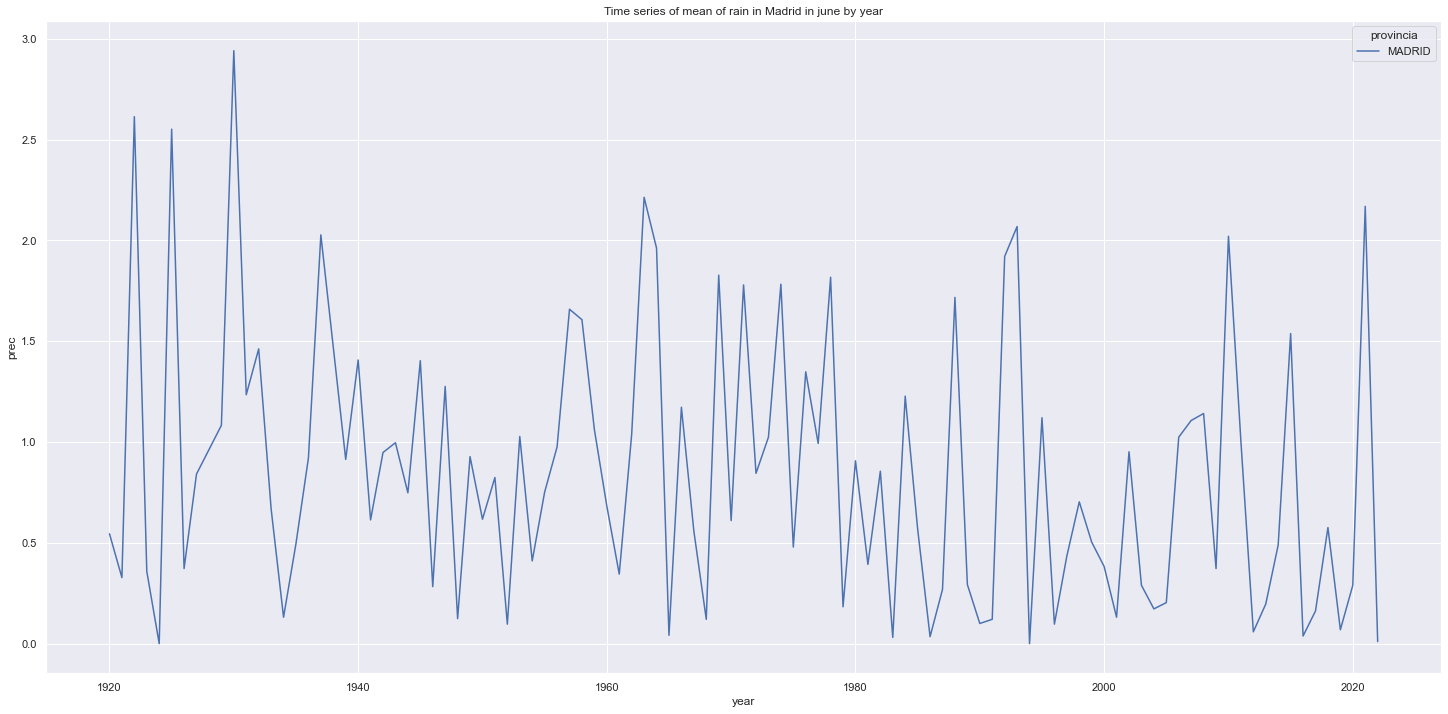

In [43]:
sns.lineplot(x='year', y='prec', hue='provincia', data=df_gprec[df_gprec['month']==6])\
    .set_title("Time series of mean of rain in Madrid in june by year");

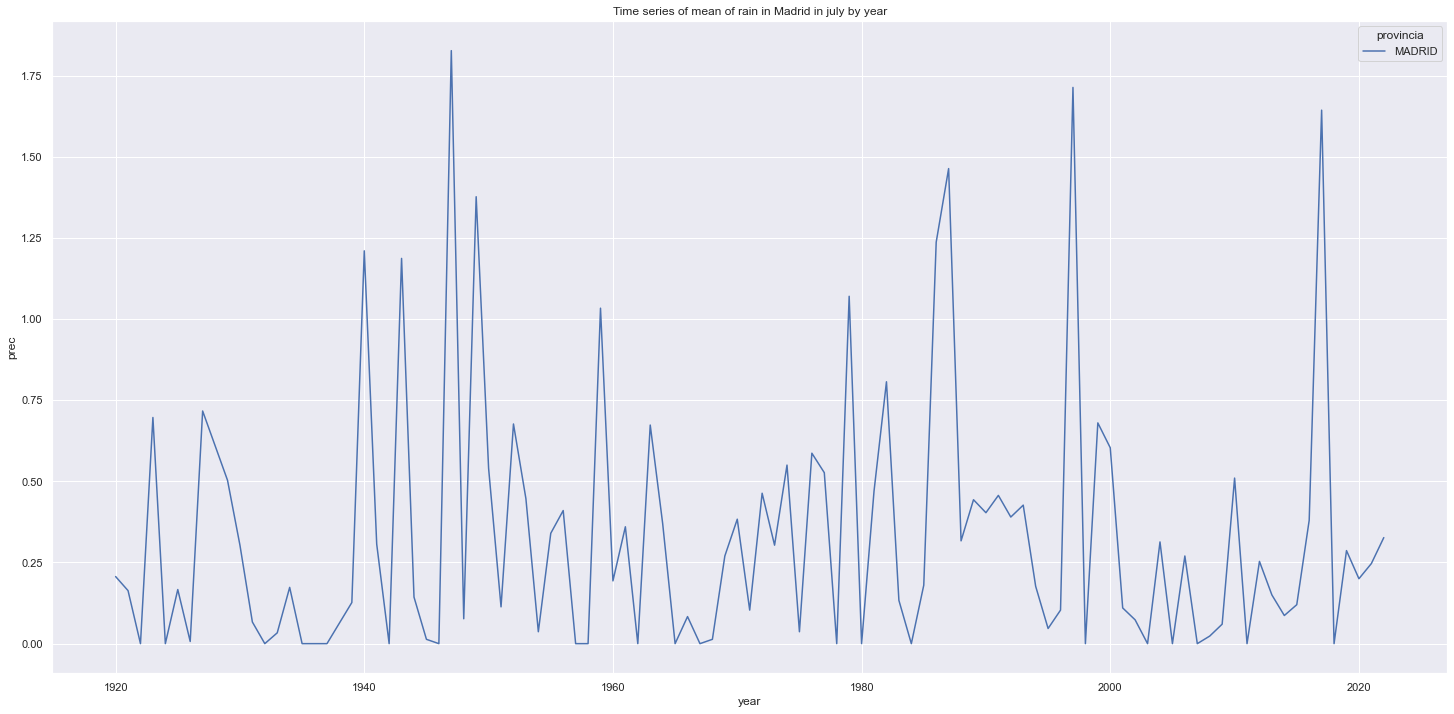

In [44]:
sns.lineplot(x='year', y='prec', hue='provincia', data=df_gprec[df_gprec['month']==7])\
    .set_title("Time series of mean of rain in Madrid in july by year");

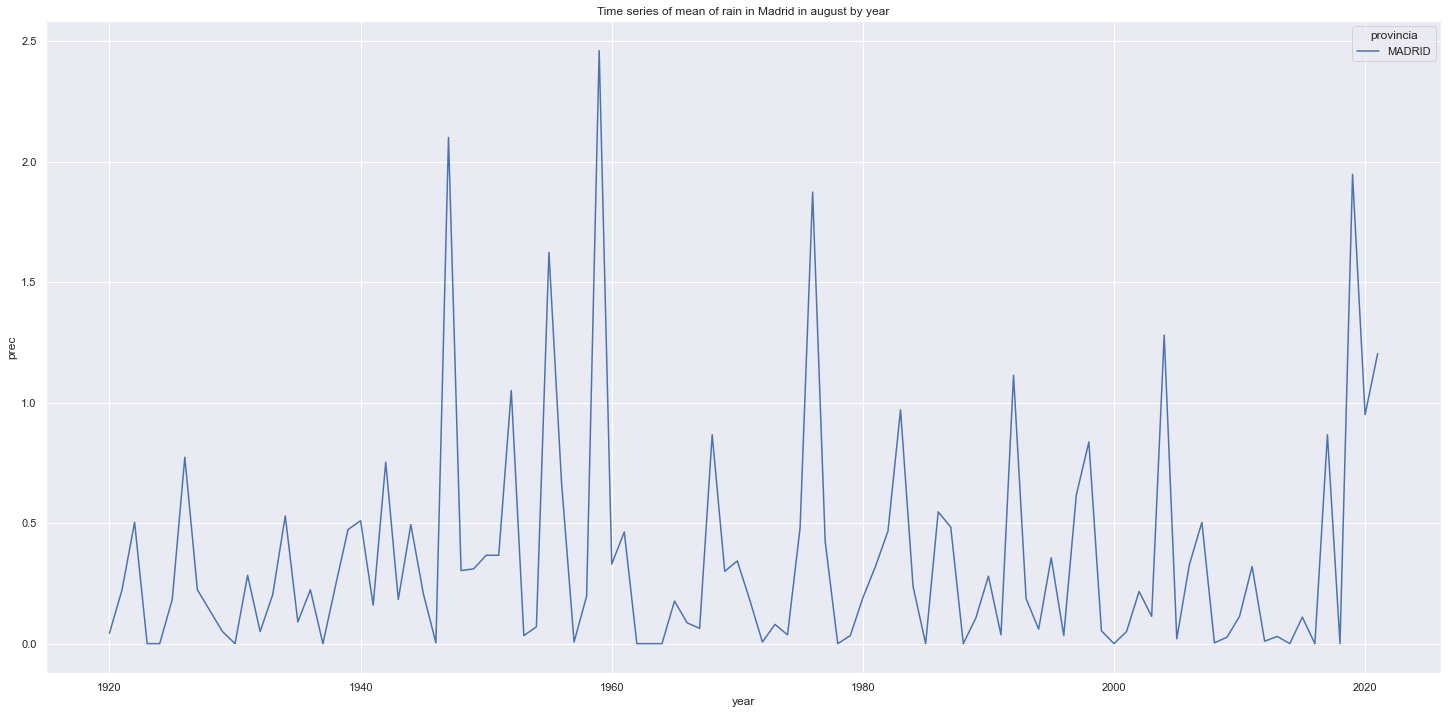

In [45]:
sns.lineplot(x='year', y='prec', hue='provincia', data=df_gprec[df_gprec['month']==8])\
    .set_title("Time series of mean of rain in Madrid in august by year");

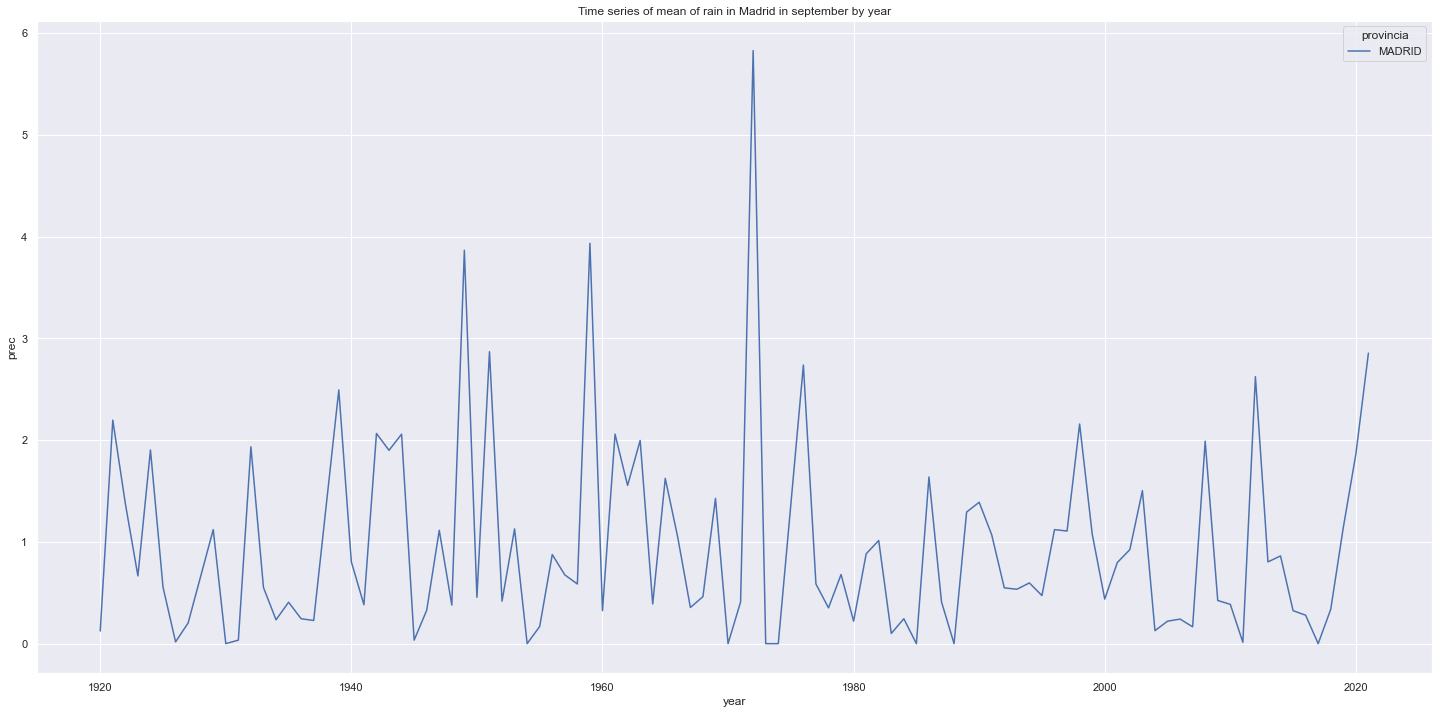

In [46]:
sns.lineplot(x='year', y='prec', hue='provincia', data=df_gprec[df_gprec['month']==9])\
    .set_title("Time series of mean of rain in Madrid in september by year");

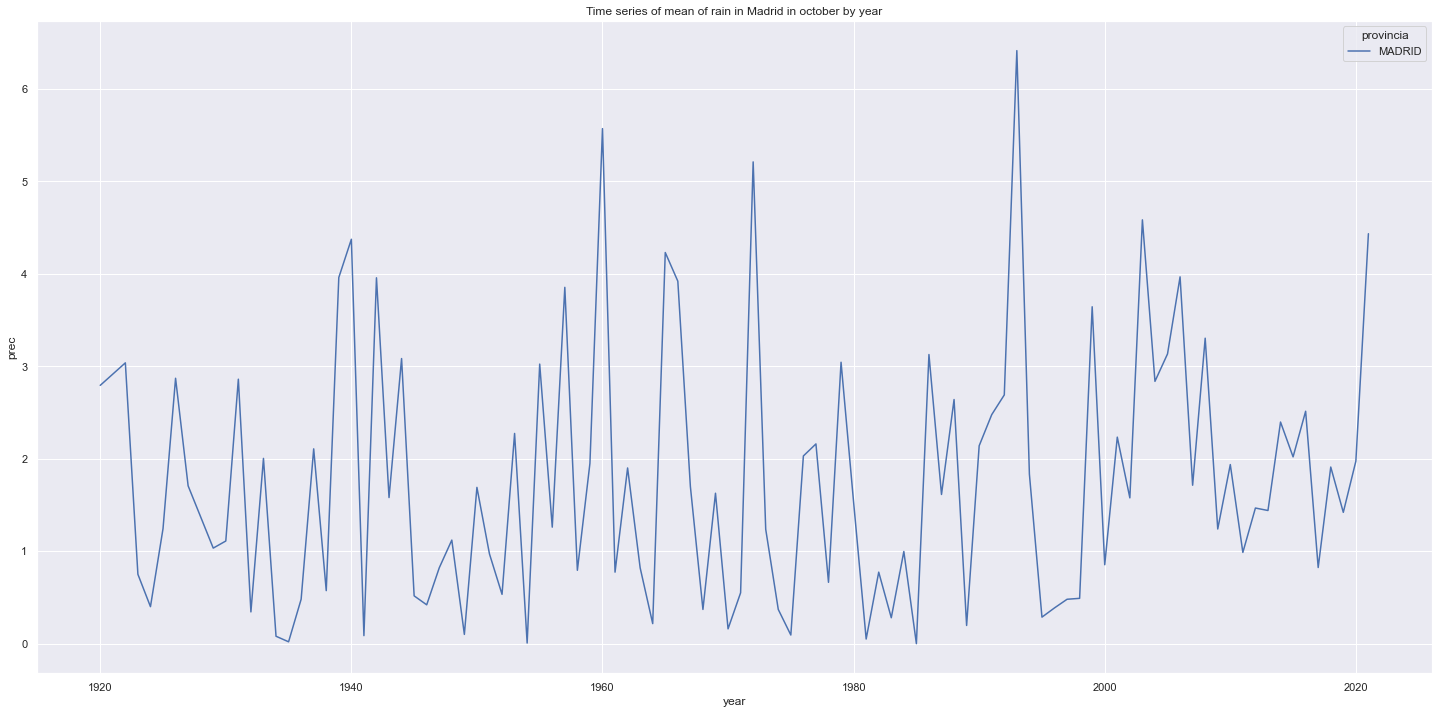

In [47]:
sns.lineplot(x='year', y='prec', hue='provincia', data=df_gprec[df_gprec['month']==10])\
    .set_title("Time series of mean of rain in Madrid in october by year");

Let's see now the dryest years by month:

In [56]:
for i in range (5,11):
    print(df_gprec[df_gprec['month']==i].sort_values('prec', ascending=True).head(10))
    print('---------------------------------------------------------------------------')

     year  month provincia      prec
583  2019      5    MADRID  0.003333
559  2015      5    MADRID  0.003333
247  1963      5    MADRID  0.050000
499  2005      5    MADRID  0.170000
415  1991      5    MADRID  0.173333
127  1943      5    MADRID  0.176667
601  2022      5    MADRID  0.206667
259  1965      5    MADRID  0.206667
23   1924      5    MADRID  0.266667
187  1953      5    MADRID  0.303333
---------------------------------------------------------------------------
     year  month provincia      prec
434  1994      6    MADRID  0.000000
24   1924      6    MADRID  0.000000
602  2022      6    MADRID  0.010345
368  1983      6    MADRID  0.031034
386  1986      6    MADRID  0.034483
566  2016      6    MADRID  0.037931
260  1965      6    MADRID  0.041379
542  2012      6    MADRID  0.058621
584  2019      6    MADRID  0.068966
446  1996      6    MADRID  0.096552
---------------------------------------------------------------------------
     year  month provincia  prec
3

In [58]:
df_gprec[(df_gprec['month']==7) & (df_gprec['year']==2022)]

,year,month,provincia,prec
603,2022,7,MADRID,0.326667


May and june 2022 were pretty dry, but they were not the dryest since 1938.
July 2022 wasn't actually that dry.

# Future work: forecast next summer in Madrid 